In [41]:
import pandas as pd
import numpy as np

from ISLP import load_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, Lasso

from mlxtend.evaluate import bias_variance_decomp

import warnings
warnings.filterwarnings('ignore')

# Q1 - Bias-Variance Tradeoff

## Q1.1

In [42]:
auto = load_data('Auto')
y    = auto['mpg']
X    = auto.drop(['mpg','name'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=156)

## Q1.2

In [43]:


model = LinearRegression()
mse, bias,var = bias_variance_decomp(model,
                                     np.array(X_train), y_train.to_numpy(), np.array(X_test), y_test.to_numpy(), 
                                     loss='mse', num_rounds=200, random_seed=156)

print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)



MSE: 15.574
Bias: 15.179
Variance: 0.394


In [44]:
MSEs   = []
Biases = []
Vars   = []

# Fit model and collect performance iteratively
for i in range(1,13):
    poly = PolynomialFeatures (degree=i, include_bias=False)

    X_train_poly = poly.fit_transform(X_train['horsepower'].to_numpy().reshape(-1, 1))
    X_test_poly  = poly.fit_transform(X_test['horsepower'].to_numpy().reshape(-1, 1))

    model = LinearRegression()
    mse, bias, var = bias_variance_decomp(model,
                                     X_train_poly, y_train.to_numpy(), X_test_poly, y_test.to_numpy(), 
                                     loss='mse', num_rounds=200, random_seed=156)

    # Calculate performance
    MSEs.append(mse)
    Biases.append(bias)
    Vars.append(var)
    print('Degree: %s, MSE: %s, Bias: %s, Var: %s ' %(i, mse.round(2),bias.round(2),var.round(2)))

Degree: 1, MSE: 26.48, Bias: 26.28, Var: 0.19 
Degree: 2, MSE: 19.02, Bias: 18.8, Var: 0.22 
Degree: 3, MSE: 19.42, Bias: 19.06, Var: 0.36 
Degree: 4, MSE: 19.55, Bias: 18.9, Var: 0.64 
Degree: 5, MSE: 19.13, Bias: 18.34, Var: 0.79 
Degree: 6, MSE: 20.92, Bias: 19.57, Var: 1.35 
Degree: 7, MSE: 20.22, Bias: 18.7, Var: 1.53 
Degree: 8, MSE: 19.97, Bias: 18.54, Var: 1.43 
Degree: 9, MSE: 19.96, Bias: 18.95, Var: 1.01 
Degree: 10, MSE: 20.14, Bias: 19.27, Var: 0.87 
Degree: 11, MSE: 22.7, Bias: 19.08, Var: 3.62 
Degree: 12, MSE: 31.42, Bias: 20.07, Var: 11.35 


In [45]:

...

Ellipsis

<Axes: title={'center': 'Bias-Variance vs Polynomial Degree'}, xlabel='Degree', ylabel='Bias and Variance'>

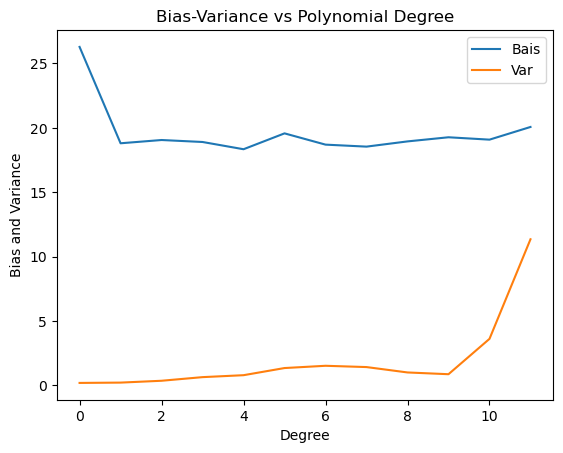

In [57]:
# Plot
results_data = { 'Bais': Biases, 'Var': Vars}
res = pd.DataFrame(results_data)

res.plot(title='Bias-Variance vs Polynomial Degree', xlabel='Degree', ylabel='Bias and Variance')

## Q1.3

<Axes: title={'center': 'Bias-Variance Tradeoff Vs Polynomial Degree Complexity'}, xlabel='Polynomial Degree', ylabel='Bias and Variance'>

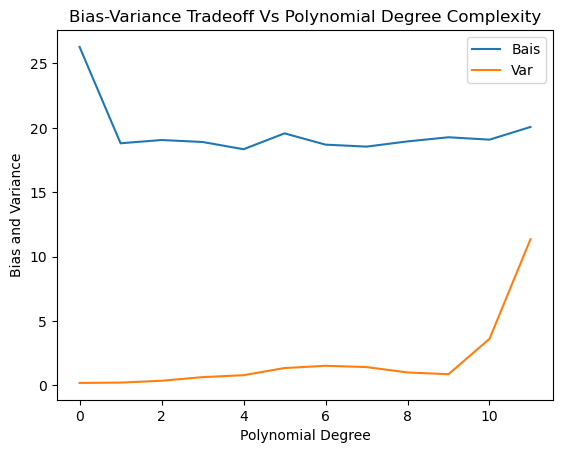

In [47]:
# Make the results a data frame

results_data = {'Bais': Biases, 'Var': Vars}
res = pd.DataFrame(results_data)

res.plot(title='Bias-Variance Tradeoff Vs Polynomial Degree Complexity', xlabel='Polynomial Degree', ylabel='Bias and Variance')


In [48]:
"""
Linear Regression: As model complexity increases the bias and variance also increases. 
"""

'\nLinear Regression: As model complexity increases the bias and variance also increases. \n'

Degree 1, MSE: 26.48, Bias: 26.28, Var: 0.19 
Degree 2, MSE: 19.09, Bias: 18.87, Var: 0.21 
Degree 3, MSE: 19.13, Bias: 18.88, Var: 0.25 
Degree 4, MSE: 19.13, Bias: 18.83, Var: 0.3 
Degree 5, MSE: 19.13, Bias: 18.83, Var: 0.3 
Degree 6, MSE: 19.12, Bias: 18.82, Var: 0.3 
Degree 7, MSE: 19.13, Bias: 18.82, Var: 0.31 
Degree 8, MSE: 19.14, Bias: 18.81, Var: 0.33 
Degree 9, MSE: 19.14, Bias: 18.8, Var: 0.34 
Degree 10, MSE: 19.13, Bias: 18.79, Var: 0.34 
Degree 11, MSE: 19.11, Bias: 18.77, Var: 0.34 
Degree 12, MSE: 19.08, Bias: 18.75, Var: 0.33 


'\nLasso: The variance stays constant and bias decrease for the first couple degrees and then converges to a certain value.\n'

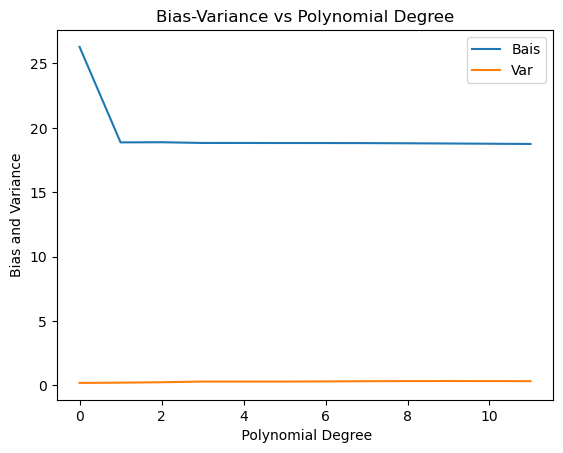

In [49]:
MSEs1   = []
Biases1 = []
Vars1   = []

# Fit model and collect performance iteratively
for i in range(1,13):
    poly = PolynomialFeatures (degree=i, include_bias=False)

    X_train_poly = poly.fit_transform(X_train['horsepower'].to_numpy().reshape(-1, 1))
    X_test_poly  = poly.fit_transform(X_test['horsepower'].to_numpy().reshape(-1, 1))

    model = Lasso(alpha=1)
    mse1, bias1, var1 = bias_variance_decomp(model,
                                     X_train_poly, y_train.to_numpy(), X_test_poly, y_test.to_numpy(), 
                                     loss='mse', num_rounds=200, random_seed=156)

    # Calculate performance
    MSEs1.append(mse1)
    Biases1.append(bias1)
    Vars1.append(var1)
    print('Degree %s, MSE: %s, Bias: %s, Var: %s ' %(i, mse1.round(2),bias1.round(2),var1.round(2)))

results_data1 = { 'Bais': Biases1, 'Var': Vars1}
res1 = pd.DataFrame(results_data1)

res1.plot(title='Bias-Variance vs Polynomial Degree', xlabel=' Polynomial Degree', ylabel='Bias and Variance') 


"""
Lasso: The variance stays constant and bias decrease for the first couple degrees and then converges to a certain value.
"""

# Q2

## Q2.1

In [68]:

model      = LinearRegression()
cv_results = cross_validate(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
mse_avg    = -cv_results['test_score'].mean()
print('MSE (5-Fold CV): ', mse_avg)

linearRegressionMAE = mse_avg



MSE (5-Fold CV):  2.418284044973554


## Q2.2

In [62]:
MAEs = []
# MAEs = []
# Fit model and collect performance iteratively

# Fit model and collect performance iteratively
for a in np.arange(0,1,.01):
    # Fit a Lasso Regression model
    model = Lasso(alpha=a)
    cv_results = cross_validate(model,  X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

    # Calculate performance
    mae_avg = -cv_results['test_score'].mean()
    MAEs.append(mae_avg)
    

    

<Axes: title={'center': '5-Fold CV MAE vs Penalty'}, xlabel='Penalty', ylabel='5-Fold CV MAE'>

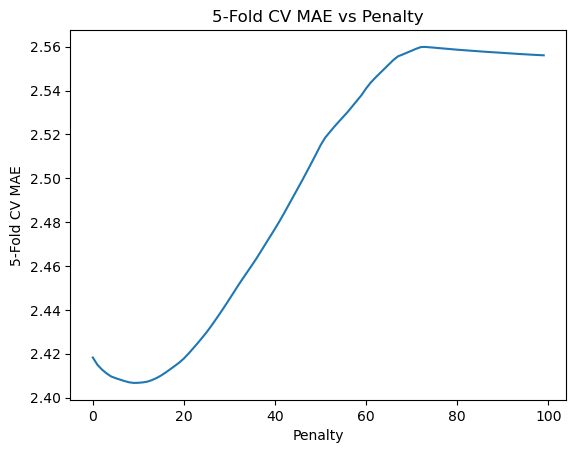

In [66]:
MAEs = pd.DataFrame(MAEs)

MAEs.plot(title='5-Fold CV MAE vs Penalty', xlabel='Penalty', ylabel='5-Fold CV MAE', legend=False)

In [70]:
print(MAEs.min())

lassoregressionMAE = MAEs.min()

print(linearRegressionMAE > lassoregressionMAE)



"""
The linear regression has a higher MAE than the Lasso regression. Which means that the Lasso regression is a better performance model.
"""

0    2.406694
dtype: float64
0    True
dtype: bool


'\nThe linear regression has a higher MAE than the Lasso regression. Which means that the Lasso regression is a better performance model.\n'

# Q3

## Q3.1

In [54]:
np.random.seed(156)

In [71]:
all_inds   = np.arange(392)
train_inds = np.random.choice(all_inds,392,replace=True)
train_uniq = set(train_inds)
test_uniq  = set(all_inds) - set(train_inds)

In [78]:
print(len(train_uniq),len(test_uniq))

print("Probability of a sample being in the train set: ", (len(train_uniq)/len(all_inds)) *100 , "%" )
print("Probability of a sample being in the test set: ", (len(test_uniq)/len(all_inds) ) *100, "%" )

255 137
Probability of a sample being in the train set:  65.05102040816327 %
Probability of a sample being in the test set:  34.94897959183674 %


## Q3.2

In [82]:
np.random.seed(156)
seeds = np.random.randint(0,10000,1000)

train_lens = []
test_lens  = []
all_inds   = np.arange(392)
for i in range(1000):
    np.random.seed(seeds[i])
    train_inds = np.random.choice(all_inds,392,replace=True)
    train_uniq = set(train_inds)
    test_uniq  = set(all_inds) - set(train_inds)
    train_lens.append(len(train_uniq))
    test_lens.append(len(test_uniq))

Average train set length:  248.216
Average test set length:  143.784


In [84]:
# Probability of jth item being in the train set
print("Average train set length: ", (np.mean(train_lens) / 392) * 100, "%")

Average train set length:  63.320408163265306 %


Ellipsis

In [87]:
# Probability of jth item being in the test set
print("Average test set length: ", np.mean(test_lens)/ 392 * 100, "%")

Average test set length:  36.679591836734694 %


# Q4

In [88]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [90]:
np.random.seed(156)
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=32)

# Mapping the numerical labels to colors
color_map = {0: 'orange', 1: 'green', 2: 'blue'}
colors = [color_map[label] for label in y]

# Creating a DataFrame
df = pd.DataFrame(X, columns=['feature1', 'feature2'])
df['color'] = colors

# Now df is your dataset with 'feature1', 'feature2', and 'color'
print(df.head())


   feature1  feature2  color
0  5.464237  8.297813   blue
1  6.181022  7.221715   blue
2  1.269388  9.419157  green
3  4.201591  4.597214   blue
4  4.958794  5.917053   blue


In [91]:
# Setting random seed for reproducibility

def generate_clusters_color_them():
    # Generating synthetic data with 3 clusters
    X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=32)

    # Mapping the numerical labels to colors
    color_map = {0: 'orange', 1: 'green', 2: 'blue'}
    colors = [color_map[label] for label in y]

    # Creating a DataFrame
    df = pd.DataFrame(X, columns=['feature1', 'feature2'])
    df['color'] = colors

    # Visualizing the data
    plt.scatter(df['feature1'], df['feature2'], c=df['color'])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Dataset with Three Clusters')
    plt.show()



In [92]:
# Function to plot decision boundaries
def plot_decision_boundary(X, y, classifier, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


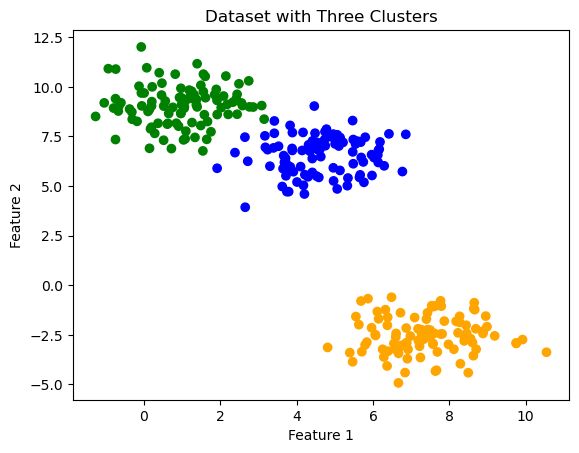

In [93]:
# The input data and the 3 clusters
generate_clusters_color_them()

### Data Analysis and Preparation:

- Prepare the dataset for binary classification tasks: blue vs not blue, green vs not green and orange vs not orange. 
   - Add 3 columns to your dataset, `is_green`, `is_blue`, `is_orange`
   - You can use ordinal mapping; map to 1 if it is the given colour and 0 if not.

In [97]:
df['is_orange'] = np.where(df['color'] == 'orange', 1, 0)
df['is_blue']   =  np.where(df['color'] == 'blue', 1, 0)
df['is_green']  = np.where(df['color'] == 'green', 1, 0)

print(df.head())

   feature1  feature2  color  is_orange  is_blue  is_green
0  5.464237  8.297813   blue          0        1         0
1  6.181022  7.221715   blue          0        1         0
2  1.269388  9.419157  green          0        0         1
3  4.201591  4.597214   blue          0        1         0
4  4.958794  5.917053   blue          0        1         0


In [ ]:
# Train Log Reg for Orange
# Splitting the data for 'orange' classification
X_train_orange, X_test_orange, y_train_orange, y_test_orange = ...

# Train Logistic Regression for 'orange' classification
orange_classifier = ...
...

# Model Accuracy
preds = ...
print('Orange Classifier Accuracy: ', accuracy_score(preds,y_test_orange))

In [ ]:
# Plotting decision boundaries for 'orange' classifier
plot_decision_boundary(X_test_orange.values, y_test_orange.values, 
                       orange_classifier, "Decision Boundary for 'Orange' Classifier",)

In [ ]:
# Train Log Reg for Green


In [ ]:
# Plotting decision boundaries for 'green' classifier


In [ ]:
# Train Log Reg for Blue


In [ ]:
# Plotting decision boundaries for 'blue' classifier


### Reflection and Analysis:
- Discuss the model's behaviour when classifying `blue` points and compare with other models for other colours.
- Discuss any patterns of misclassification and possible reasons for these.

...